<a href="https://colab.research.google.com/github/MrAkash03/SMS-spam-classification/blob/main/Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving spam.csv to spam.csv


In [11]:
import pandas as pd

In [13]:
!pip install chardet

In [16]:
import chardet

In [17]:
!pip install pandas

In [20]:
with open('spam.csv', 'rb') as f:
       encoding = chardet.detect(f.read())['encoding']

df = pd.read_csv('spam.csv', encoding=encoding)

In [21]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [22]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [26]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [23]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:

df['spam']=df['v1'].apply(lambda x: 1 if x=='spam' else 0)

In [28]:
df.head()

,v1,v2,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [29]:
df.isna().sum()

v1      0
v2      0
spam    0
dtype: int64

In [34]:
df.duplicated().sum()

403

In [35]:
df.shape

(5572, 3)

In [39]:
df.drop_duplicates(keep='first',inplace=True)

In [40]:
df.shape

(5169, 3)

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

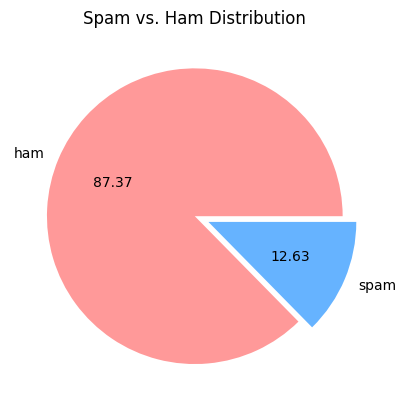

In [142]:
colors = ['#ff9999', '#66b3ff']
plt.pie(df['spam'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f", colors=colors, explode = (0, 0.1))

plt.title('Spam vs. Ham Distribution')
plt.show()

In [43]:
!pip install nltk

In [45]:
df.rename(columns={'v2':'text'},inplace=True)

In [46]:
df.head()

,v1,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [70]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import string

In [71]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
def modified_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english'):
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  porter = PorterStemmer()
  for i in text:
    y.append(porter.stem(i))

  return " ".join(y)



In [76]:
df['modified_text']=df['text'].apply(modified_text)

In [77]:
df.head()

,v1,text,spam,modified_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think goe usf live around though


In [119]:
from wordcloud import WordCloud

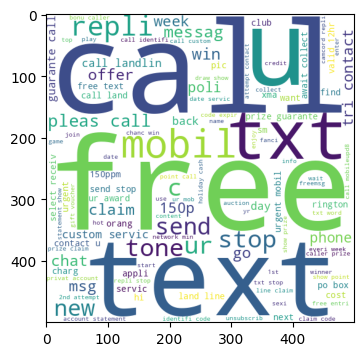

In [122]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam=wc.generate(df[df['spam']==1]['modified_text'].str.cat(sep=" "))
plt.figure(figsize=(9,4))
plt.imshow(spam)
plt.show()

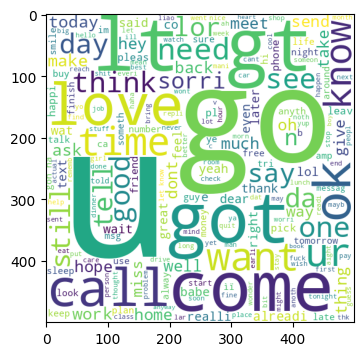

In [123]:
ham=wc.generate(df[df['spam']==0]['modified_text'].str.cat(sep=" "))
plt.figure(figsize=(9,4))
plt.imshow(spam)
plt.show()

**MODEL BUILDING**

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

#split
x_train, x_test, y_train, y_test = train_test_split(df.text, df.spam, test_size=0.2, random_state=30)

#vectorization
v = CountVectorizer()

# Converting
x_train_counts = v.fit_transform(x_train)

# MultinomialNB object
model = MultinomialNB()

# Fit
model.fit(x_train_counts, y_train)

MultinomialNB()

In [109]:
model.score(x_train_counts,y_test)

0.9816247582205029

In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
confusion_matrix(y_test,model.predict(v.transform(x_test)))

array([[885,   3],
       [ 16, 130]])

In [116]:
import seaborn as sns

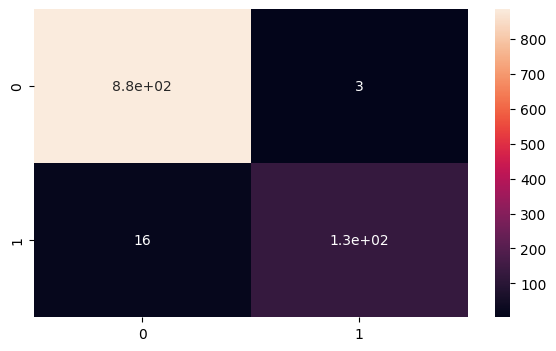

In [118]:
plt.figure(figsize=(7,4))
sns.heatmap(confusion_matrix(y_test,model.predict(v.transform(x_test))),annot=True)
plt.show()

In [126]:
from sklearn.metrics import classification_report

In [127]:
classification_report(y_test,model.predict(v.transform(x_test)))

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       888\n           1       0.98      0.89      0.93       146\n\n    accuracy                           0.98      1034\n   macro avg       0.98      0.94      0.96      1034\nweighted avg       0.98      0.98      0.98      1034\n'

In [129]:
from sklearn.metrics import precision_score
precision_score(y_test,model.predict(v.transform(x_test)))

0.9774436090225563

In [136]:
import pickle

In [145]:
with open('model.pkl','wb') as f:
  pickle.dump(model,f)